# Regression model evaluation matrix

### Basic evaluation metrics are...
* R^2 or coefficient of determination
* Mean absolute error (MAE)
* Mean square error (MSE)

In [1]:
# Importing all basic modeules for data visualization....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing datasets from sklearn modeules.....boston data set...
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# Splitting data into trainiing and testing data..
from sklearn.model_selection import train_test_split

# Setting up random seed...
np.random.seed(42)

# Freatures varaibles..
X = boston_df.drop("target",axis=1)

# Target variables...
y = boston_df["target"]

# Splitting data...
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [4]:
# Setting up the model....
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Fitting in the model...
model.fit(X_train,y_train)

RandomForestRegressor()

### R^2 or coefficient of determination
* Compares your model predictions to the mean of the targets.Values can range from nrgative infinity (a very poor model) to 1.
* For example....if all model does is predict the mean of the targets,it's R^2 value would be 0.
* And if your model perfectly predicts a range of numbers it's R^2 value would be 1

In [5]:
model.score(X_test,y_test)

0.8654448653350507

In [6]:
from sklearn.metrics import r2_score

# Fill the array with y_test_mean

y_test_mean = np.full(len(y_test),y_test.mean())

In [7]:
y_test.mean()

21.488235294117644

In [8]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [9]:
r2_score(y_test,y_test_mean)

0.0

In [10]:
r2_score(y_test,y_test)

1.0

### Mean Absolute Error (MAE)

MAE is the average of the absolute differences between predictions and actual values.It gives you an idea of how wrong your predictions are.

In [11]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [12]:
mae_df = pd.DataFrame({"Actual values":y_test,"Predicted values":y_preds})
mae_df

,Actual values,Predicted values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


In [13]:
mae_df["differences"] = mae_df["Actual values"] - mae_df["Predicted values"]
mae_df

,Actual values,Predicted values,differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


### Mean Square Error (MSE)

In [14]:
# Finding the mean square error....
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [15]:
# Calculating mean square error by hand...
squared = np.square(mae_df["differences"])
squared

173     0.269361
274     3.334276
491     9.979281
72      0.435600
452     0.628849
         ...    
412    22.477081
436     8.271376
411    12.873744
86      5.267025
75      5.914624
Name: differences, Length: 102, dtype: float64

In [16]:
squared.mean()

9.867437068627442

## Key Notes

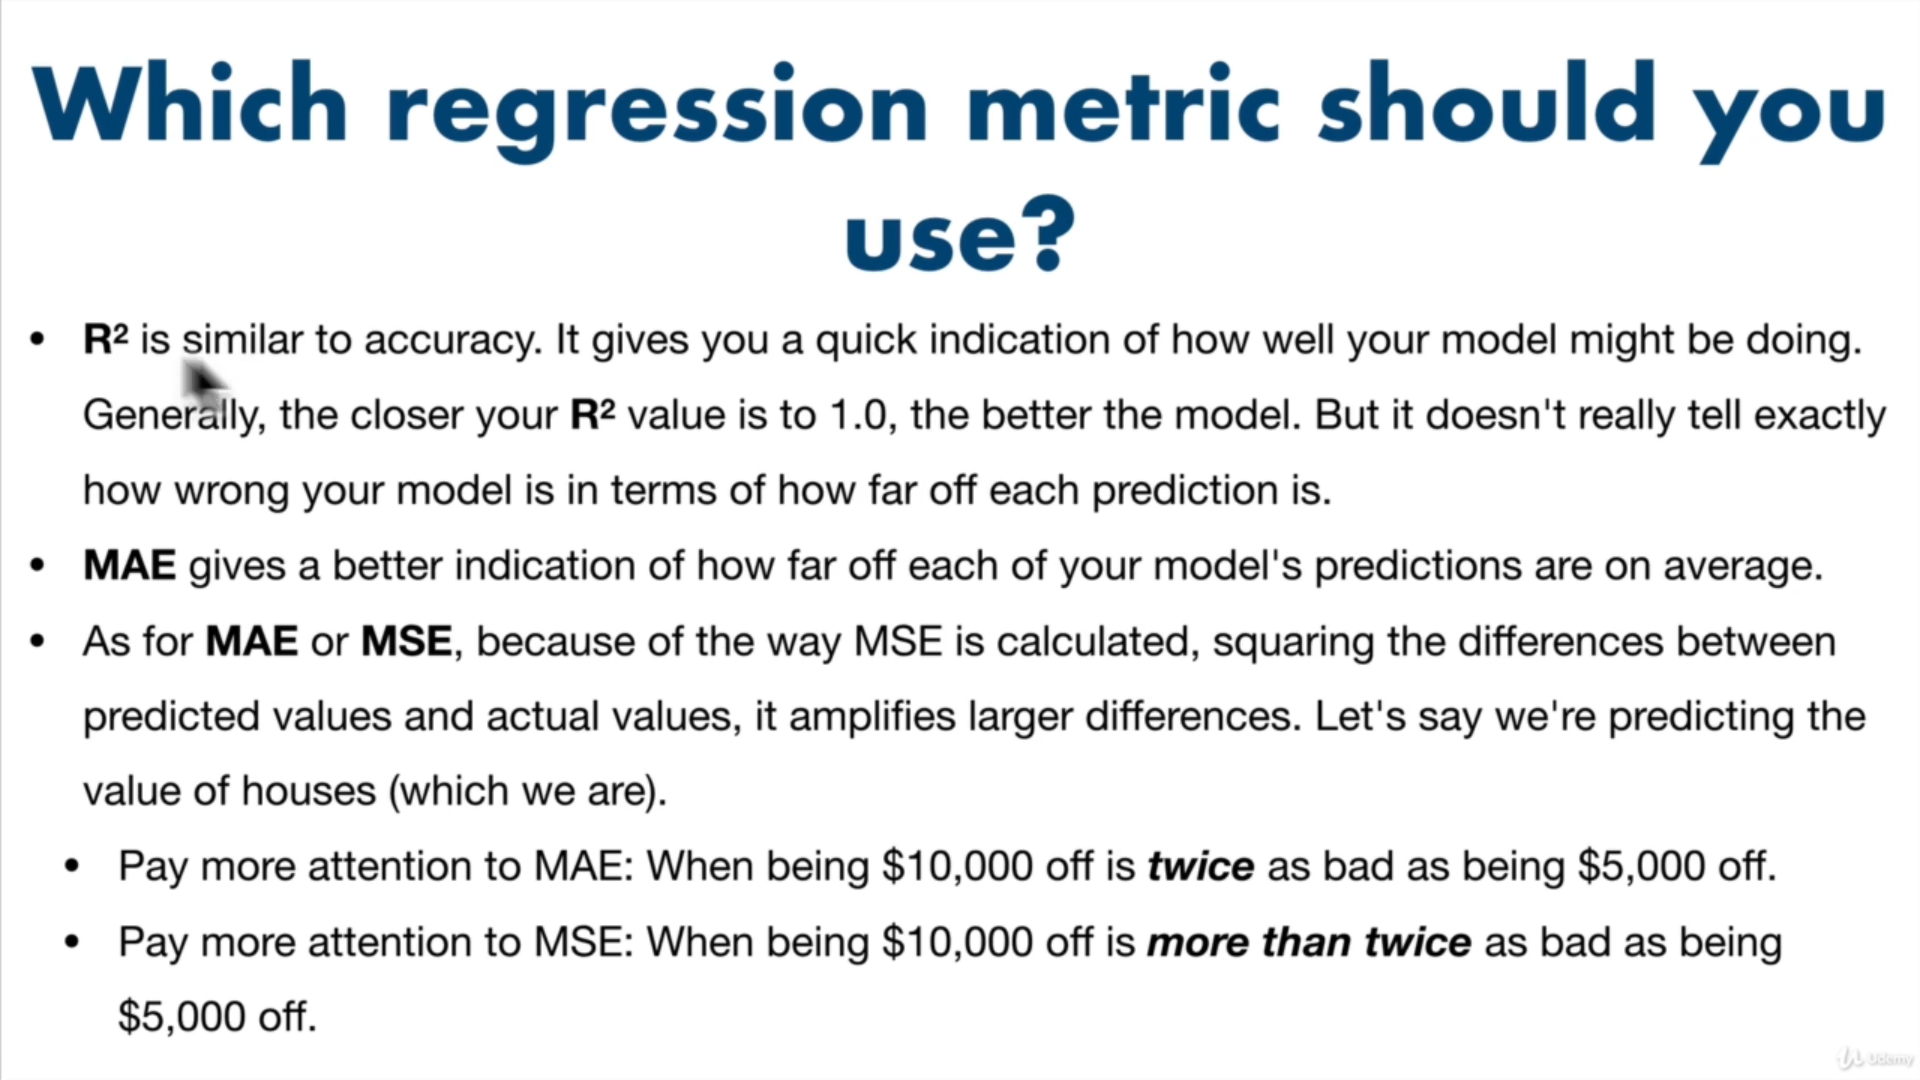

### Implimenting `scoring` parameter cross_val_score

In [17]:
# Importing cross_val_score from model_selection modeule
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cross_val_score(model,X,y,cv=5)

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [18]:
np.random.seed(42)
c_r2 = cross_val_score(model,X,y,cv=5,scoring="r2")
c_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [19]:
np.random.seed(42)
c_mae = cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
c_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [20]:
np.random.seed(42)
c_mse = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
c_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

## Using sklearn.metrics module for the evaluation

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442
